In [23]:
import pandas as pd
import numpy as np
from collections import Counter 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
post_df = pd.read_csv("post_time_features.csv") # The path that contains posts metadata with time features

In [25]:
FEATURES = ['ER', 'hashtags', 'hashtag_count', 'sponsor']
df = post_df[FEATURES]

In [26]:
df_sponsored = df[df['sponsor']==1]

# Extract all hashtags, remove empty hashtags
df_sponsored['cleaned_hashtags'] = df_sponsored['hashtags'].dropna().apply(lambda w:eval(w))

# Exclude 'ad' and 'sponsor' from the count 
unwanted_word = ['ad', 'sponsor', 'ad\'', 'sponsored']
df_sponsored['cleaned_hashtags'] = df_sponsored['cleaned_hashtags'].apply(lambda x: [w.lower() for w in x if w.lower() not in unwanted_word])


# Concatenate all hashtags into a single string
all_hashtags = [item for sublist in df_sponsored['cleaned_hashtags'].tolist() for item in sublist]

# Count occurrences of each hashtag
hashtags_count = Counter(all_hashtags)

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/133288748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sponsored['cleaned_hashtags'] = df_sponsored['hashtags'].dropna().apply(lambda w:eval(w))
/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/133288748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sponsored['cleaned_hashtags'] = df_sponsored['cleaned_hashtags'].apply(lambda x: [w.lower() for w in x if w.lower() not in unwanted_word])


### Visulize most common hashtags

Top 20 hashtags (excluding 'ad' and 'sponsor'):
{'liketkit': 4191, 'ootd': 3963, 'fashion': 3092, 'fashionblogger': 3019, 'danielwellington': 2599, 'blogger': 2037, 'style': 1913, 'styleblogger': 1590, 'beauty': 1506, 'influencer': 1374, 'love': 1348, 'streetstyle': 1186, 'werbung': 1186, 'outfitoftheday': 1092, 'fashionista': 1059, 'ltkunder50': 1058, 'ltkstyletip': 1028, 'outfit': 981, 'skincare': 934, 'bloggerstyle': 921}


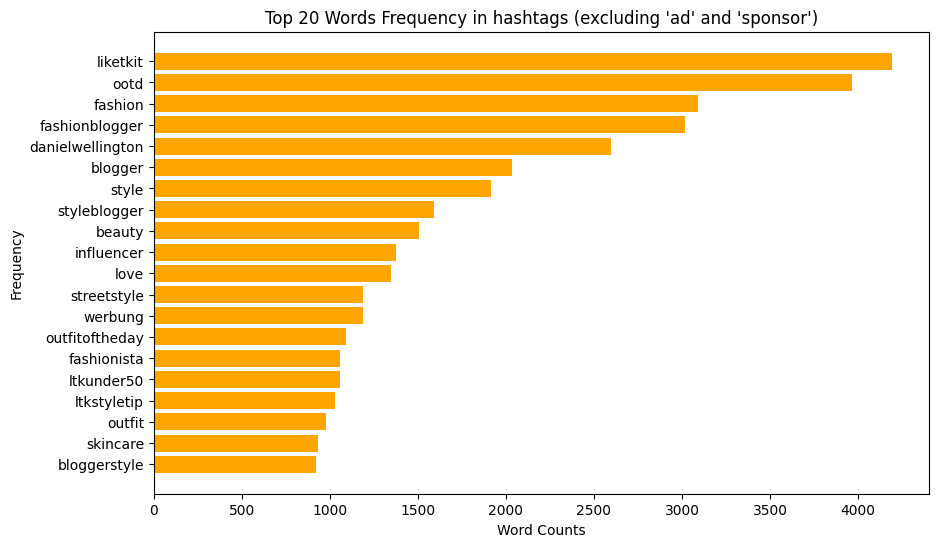

In [27]:
# Get the top ten most frequent hashtags
top20 = dict(hashtags_count.most_common(20))


# Extract data from clinton_freq
words = list(top20.keys())
frequencies = list(top20.values())

print("Top 20 hashtags (excluding 'ad' and 'sponsor'):")
print(top20)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='orange')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency in hashtags (excluding \'ad\' and \'sponsor\')')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top

# plt.savefig("viz/top20_hashtags.png", format="png")

plt.show()

In [28]:
df_sponsored['top20_count'] = df_sponsored['cleaned_hashtags'].apply(lambda x: sum([1 for w in x if w in top20.keys()]))

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/3958489494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sponsored['top20_count'] = df_sponsored['cleaned_hashtags'].apply(lambda x: sum([1 for w in x if w in top20.keys()]))


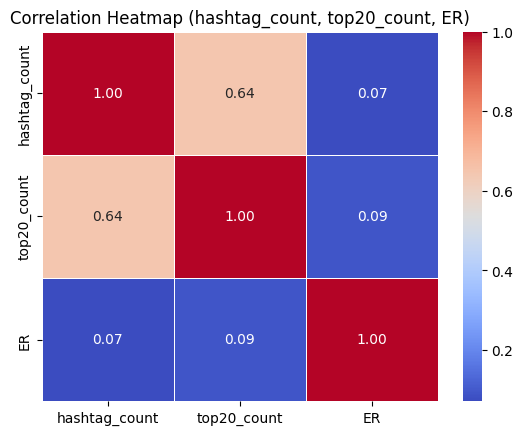

In [29]:
# Create a correlation matrix (assuming you have the data)
corr_matrix = df_sponsored[['hashtag_count', 'top20_count', 'ER']].corr()

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5)  # Adjust parameters as desired

plt.title('Correlation Heatmap (hashtag_count, top20_count, ER)')
plt.show()

## Word cloud

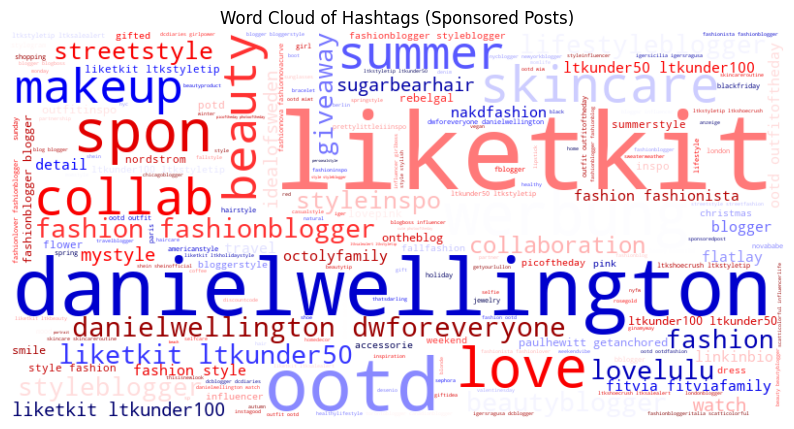

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="seismic", random_state=111).generate(' '.join(all_hashtags))


# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Hashtags (Sponsored Posts)')
plt.axis('off')
# plt.savefig("viz/wordcloud.png", format="png")
plt.show()

### Visulize the relation between hashtags usage and Engagement Rate

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/1320645029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ER'] = 100*temp['ER']
/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/1320645029.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=temp, x='hashtag_count', y='ER', palette="Set2")


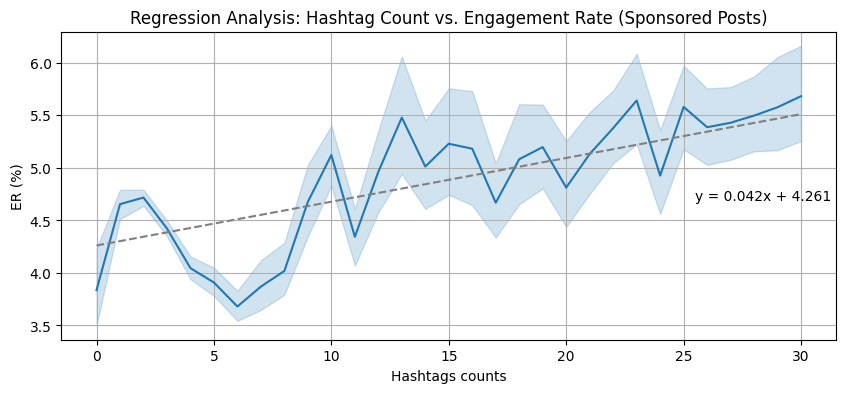

In [31]:
temp = df_sponsored[df_sponsored['hashtag_count']<=30]
temp['ER'] = 100*temp['ER']
    
plt.figure(figsize=(10, 4))

ax = sns.lineplot(data=temp, x='hashtag_count', y='ER', palette="Set2")


# Calculate slope and intercept using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(temp['hashtag_count'], temp['ER'])
line_eq = f"y = {slope:.3f}x + {intercept:.3f}" 

x_vals = temp['hashtag_count'].min(), temp['hashtag_count'].max()  # Get data range for line
y_vals = slope * np.array(x_vals) + intercept  # Calculate y values for line equation
ax.plot(x_vals, y_vals, color='grey', linestyle='dashed')  # Plot the regression line

# Add the regression equation as annotation
ax.text(x_vals[0] + (x_vals[1] - x_vals[0])*0.85,  # Position the text
        y_vals[0] + (y_vals[1] - y_vals[0]*1.2),  # Position the text
        line_eq, ha='left', va='bottom',  # Horizontal and vertical alignment
        fontsize=10, color='black')  # Adjust font size and color


ax.set(xlabel='Hashtags counts',
       ylabel='ER (%)',
       title='Regression Analysis: Hashtag Count vs. Engagement Rate (Sponsored Posts)'
)


plt.grid(True)
# plt.savefig("viz/hashtags_count_ER.png", format="png")
plt.show()


/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73576/4124741635.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df_sponsored, x='top20_count', y='ER', palette="Set2")


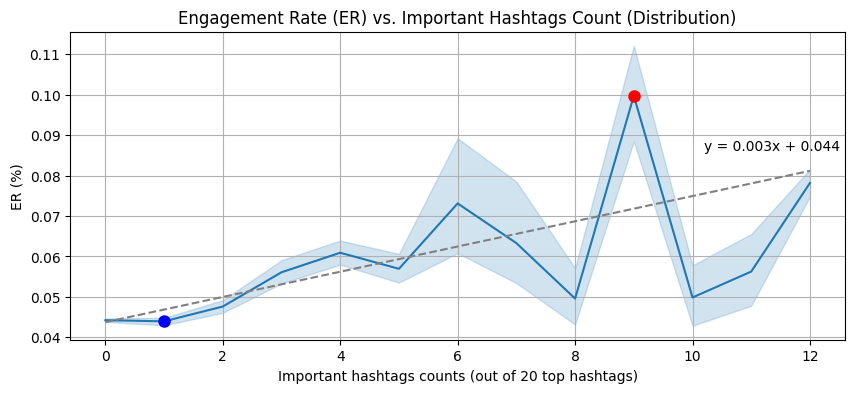

In [32]:
temp = df_sponsored.copy()
temp['ER'] = 100*temp['ER']

plt.figure(figsize=(10, 4))

ax = sns.lineplot(data=df_sponsored, x='top20_count', y='ER', palette="Set2")


frame = df_sponsored.groupby('top20_count')['ER'].mean()

plt.plot(frame.argmax(), frame.max(), color='red', markersize=8, marker='o')
plt.plot(frame.argmin(), frame.min(), color='blue', markersize=8, marker='o')

# Calculate slope and intercept using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sponsored['top20_count'], df_sponsored['ER'])
line_eq = f"y = {slope:.3f}x + {intercept:.3f}" 

x_vals = df_sponsored['top20_count'].min(), df_sponsored['top20_count'].max()  # Get data range for line
y_vals = slope * np.array(x_vals) + intercept  # Calculate y values for line equation
ax.plot(x_vals, y_vals, color='grey', linestyle='dashed')  # Plot the regression line

# Add the regression equation as annotation
ax.text(x_vals[0] + (x_vals[1] - x_vals[0])*0.85,  # Position the text
        y_vals[0] + (y_vals[1] - y_vals[0]*0.9),  # Position the text
        line_eq, ha='left', va='bottom',  # Horizontal and vertical alignment
        fontsize=10, color='black')  # Adjust font size and color


ax.set(xlabel='Important hashtags counts (out of 20 top hashtags)',
       ylabel='ER (%)',
       title='Engagement Rate (ER) vs. Important Hashtags Count (Distribution)'
)

plt.grid(True)

# plt.savefig("viz/important_hashtags_count_ER.png", format="png")
plt.show()
